# Cifar-100 Classification with basic layers

In [1]:
import tensorflow as tf
import numpy as np

(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar100.load_data()
print(f"Training data {x_train.shape}")
print(f"Training label {y_train.shape}")
print(f"Max number of training label {np.max(y_train)}")


Training data (50000, 32, 32, 3)
Training label (50000, 1)
Max number of training label 99


## Look at some examples

In [ ]:
import matplotlib.pyplot as plt
fig, axs = plt.subplots(2, 2, figsize=(4, 4))

for index, img in enumerate(x_train[0:4]):
    axs[int(index/2),index%2].imshow(img, cmap="gray_r")


## Network without Convolutions

In [2]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, BatchNormalization, Dropout
from tensorflow.keras.regularizers import l2

opt=Adam(
    learning_rate=0.0001,
    beta_1=0.8,
    beta_2=0.999)

model = Sequential([
      Flatten(),
      BatchNormalization(),
      Dense(512, activation='sigmoid', kernel_regularizer=l2(0.01)),
      Dropout(0.2),
      BatchNormalization(),
      Dense(512, activation='sigmoid', kernel_regularizer=l2(0.01)),
      Dropout(0.2),
      Dense(100, activation="softmax", kernel_regularizer=l2(0.01))
      ])
model.compile(optimizer=opt, loss="sparse_categorical_crossentropy", metrics=["accuracy"]) 

model.fit(
    x_train, 
    y_train, 
    validation_data=(x_test, y_test),
    epochs=100,
    batch_size=300
)

Epoch 1/100
167/167 [==============================] - 8s 30ms/step - loss: 15.8082 - accuracy: 0.0433 - val_loss: 12.2183 - val_accuracy: 0.0897
Epoch 2/100
167/167 [==============================] - 4s 25ms/step - loss: 10.0605 - accuracy: 0.0730 - val_loss: 8.3425 - val_accuracy: 0.1020
Epoch 3/100
167/167 [==============================] - 4s 25ms/step - loss: 7.3759 - accuracy: 0.0816 - val_loss: 6.5518 - val_accuracy: 0.1008
Epoch 4/100
167/167 [==============================] - 4s 25ms/step - loss: 6.1097 - accuracy: 0.0847 - val_loss: 5.6933 - val_accuracy: 0.1035
Epoch 5/100
167/167 [==============================] - 4s 24ms/step - loss: 5.4773 - accuracy: 0.0888 - val_loss: 5.2441 - val_accuracy: 0.1054
Epoch 6/100
167/167 [==============================] - 4s 24ms/step - loss: 5.1288 - accuracy: 0.0892 - val_loss: 4.9823 - val_accuracy: 0.1030
Epoch 7/100
167/167 [==============================] - 4s 25ms/step - loss: 4.9145 - accuracy: 0.0890 - val_loss: 4.8152 - val_accura

In [6]:
prediction = tf.argmax(model.predict(x_test),axis=1)

313/313 [==============================] - 2s 7ms/step


In [32]:
prediction.shape

TensorShape([10000])

In [38]:
np.sum(y_test.reshape(-1)==prediction)

1304

## Plot Confusion Matrix

In [35]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(prediction, y_test.reshape(-1))

C:\Users\herrler\AppData\Local\Temp\ipykernel_9108\2234063754.py:32: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels([''] + classes)
C:\Users\herrler\AppData\Local\Temp\ipykernel_9108\2234063754.py:33: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([''] + classes)


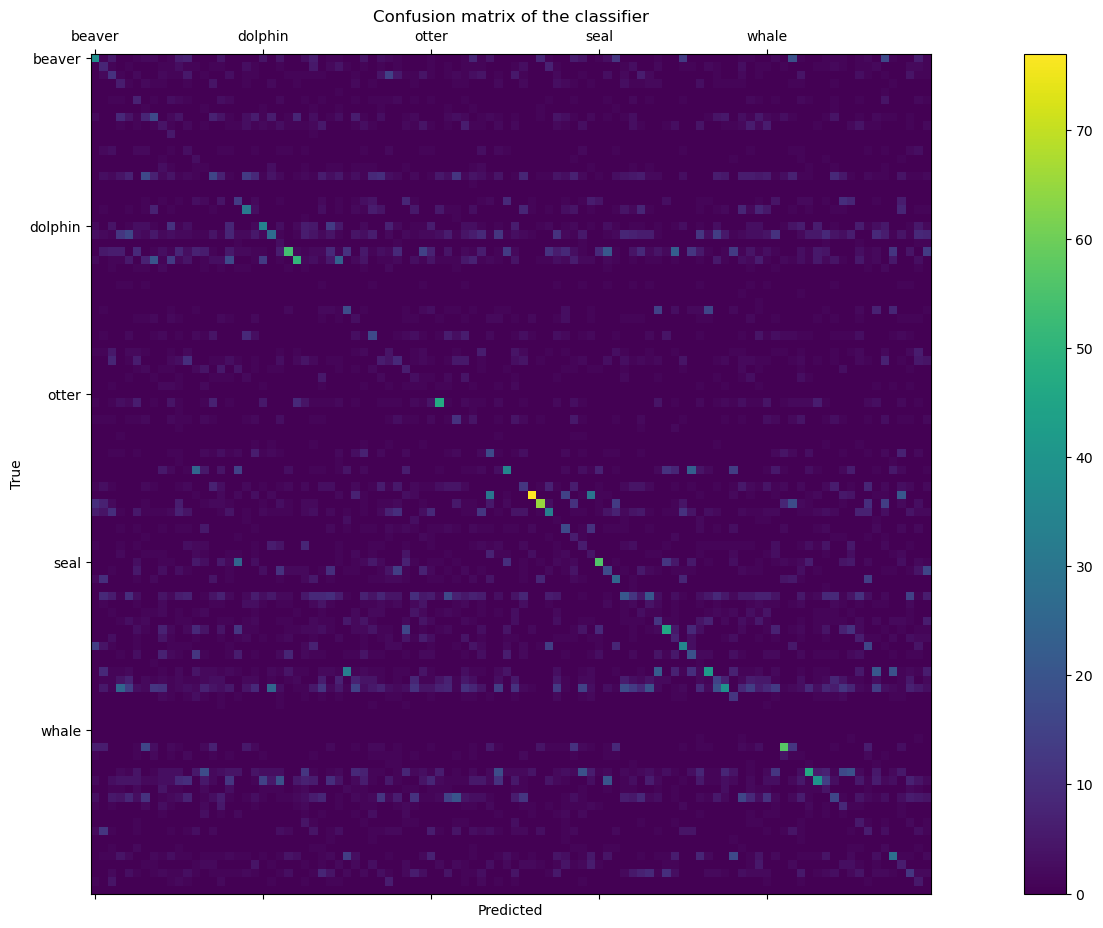

In [36]:
# Name of all classes in CIFAR-100
classes = ['beaver', 'dolphin', 'otter', 'seal', 'whale', 
'aquarium' ,'fish', 'ray', 'shark', 'trout', 
'orchids', 'poppies', 'roses', 'sunflowers', 'tulips', 
'bottles', 'bowls', 'cans', 'cups', 'plates', 
'apples', 'mushrooms', 'oranges', 'pears', 'sweet peppers', 
'clock', 'computer keyboard', 'lamp', 'telephone', 'television', 'bed', 'chair', 'couch', 'table', 'wardrobe', 
'bee', 'beetle', 'butterfly', 'caterpillar', 'cockroach', 
'bear', 'leopard', 'lion', 'tiger', 'wolf', 
'bridge', 'castle', 'house', 'road', 'skyscraper', 
'cloud', 'forest', 'mountain', 'plain', 'sea', 
'camel', 'cattle', 'chimpanzee', 'elephant', 'kangaroo', 
'fox', 'porcupine', 'possum', 'raccoon', 'skunk', 
'crab', 'lobster', 'snail', 'spider', 'worm', 
'baby', 'boy', 'girl', 'man', 'woman', 
'crocodile', 'dinosaur', 'lizard', 'snake', 'turtle', 
'hamster', 'mouse', 'rabbit', 'shrew', 'squirrel', 
'maple', 'oak', 'palm', 'pine', 'willow', 
'bicycle', 'bus', 'motorcycle', 'pickup truck', 'train', 
'lawn-mower', 'rocket', 'streetcar', 'tank', 'tractor']
     


# Plot the confusion matrix
import matplotlib.pyplot as plt
#print(cm)
fig = plt.figure(figsize=(24,24))
ax = fig.add_subplot(211)
cax = ax.matshow(cm)
plt.title('Confusion matrix of the classifier')
fig.colorbar(cax)
ax.set_xticklabels([''] + classes)
ax.set_yticklabels([''] + classes)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()
     


Scores in Tabular form

In [39]:
from sklearn.metrics import classification_report
print(classification_report(y_test.reshape(-1), prediction, target_names=classes, digits=3))

                   precision    recall  f1-score   support

           beaver      0.177     0.380     0.241       100
          dolphin      0.092     0.080     0.086       100
            otter      0.091     0.110     0.100       100
             seal      0.105     0.060     0.076       100
            whale      0.000     0.000     0.000       100
         aquarium      0.123     0.070     0.089       100
             fish      0.091     0.010     0.018       100
              ray      0.101     0.170     0.126       100
            shark      0.037     0.040     0.039       100
            trout      0.833     0.050     0.094       100
          orchids      0.000     0.000     0.000       100
          poppies      0.068     0.030     0.042       100
            roses      0.333     0.030     0.055       100
       sunflowers      0.040     0.010     0.016       100
           tulips      0.051     0.160     0.077       100
          bottles      0.000     0.000     0.000       

C:\Users\herrler\Anaconda3\envs\DL\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\herrler\Anaconda3\envs\DL\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\herrler\Anaconda3\envs\DL\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
